# B-Spline curve plotting demo
In this notebook we demonstrate the spatial nature of B-Spline curves - their parameters serve as control
points that define the curve's shape in space.

In [10]:
import math
import torch
import torchcurves.functional as tcf
import matplotlib.pyplot as plt

## Define knots

In [11]:
n_control_points = 11
degree = 3
knots = tcf.uniform_augmented_knots(n_control_points, degree)
knots

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -0.7500, -0.5000, -0.2500,  0.0000,
         0.2500,  0.5000,  0.7500,  1.0000,  1.0000,  1.0000,  1.0000])

## Define control points of various shapes

In [12]:
num_curves = 3
dim = 2

t = torch.linspace(-1, 1, n_control_points)

pi = math.pi
first_cp = torch.stack([torch.sin(pi * t), torch.cos(pi * t)], dim=1)
second_cp = torch.stack([torch.sin(pi * t) * t.exp(), torch.cos(pi * t) * t.exp()], dim=1)
third_cp = torch.stack([t.square() + t - t.exp(), -t.square() + 2 * t - 1], dim=1)
control_points = torch.stack([first_cp, second_cp, third_cp], dim=0)
control_points.shape

torch.Size([3, 11, 2])

## Sample and draw the B-Spline curves with 100 sample points from -1 to 1

In [13]:
sample_points = torch.torch.linspace(-1, 1, 100)
spline_args = sample_points.reshape(-1, 1).expand(-1, 3)

In [14]:
curve_points = tcf.bspline_curves(spline_args, control_points)
curve_points.shape

torch.Size([100, 3, 2])

In [15]:
first_curve, second_curve, third_curve = curve_points.unbind(dim=1)

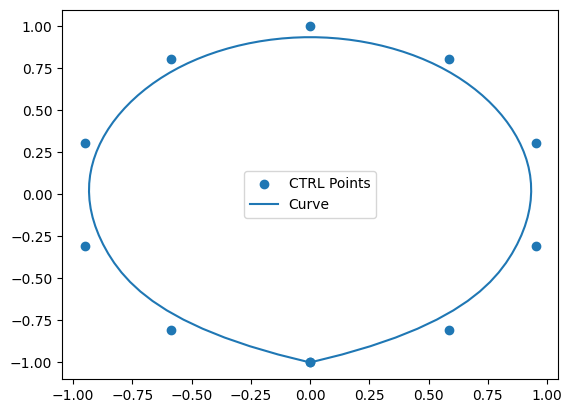

In [16]:
plt.scatter(*first_cp.unbind(dim=1), label='CTRL Points')
plt.plot(*first_curve.unbind(dim=1), label='Curve')
plt.legend()
plt.show()

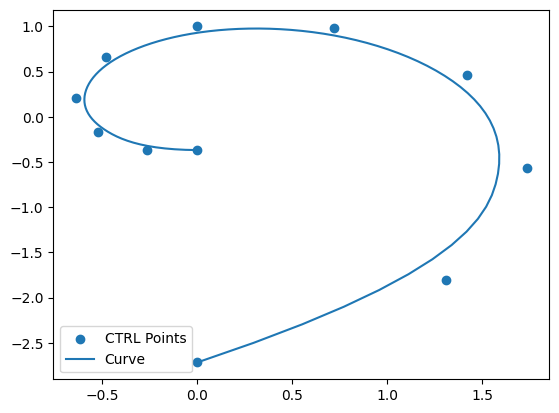

In [17]:
plt.scatter(*second_cp.unbind(dim=1), label='CTRL Points')
plt.plot(*second_curve.unbind(dim=1), label='Curve')
plt.legend()
plt.show()

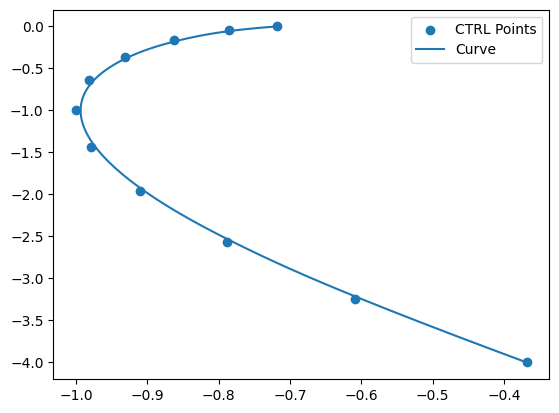

In [18]:
plt.scatter(*third_cp.unbind(dim=1), label='CTRL Points')
plt.plot(*third_curve.unbind(dim=1), label='Curve')
plt.legend()
plt.show()